#Разведочный анализ данных:

Мы будем работать с набор данных о намерениях покупателей в интернет-магазинах

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DIAMONDS_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/online_shoppers_intention.csv"

In [3]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

* `Administrative` - тип страница, общее время проведенное на странице, число  
* `Administrative_Duration` - тип страница, общее время проведенное на странице, число  
* `Informational` - тип страница, общее время проведенное на странице, число  
* `Informational Duration` - тип страница, общее время проведенное на странице, число  
* `Product Related` - тип страница, общее время проведенное на странице, число  
* `Product Related Duration` - тип страница, общее время проведенное на странице, число  
* `Bounce Rate` -  процент посетителей  которые заходят на сайт с этой страницы, а затем уходят ("отскакивают"), не вызывая никаких других запросов к серверу аналитики в течение этой сессии.
* `Exit Rate` - для конкретной веб-страницы рассчитывается как процентное соотношение всех просмотров страницы, которые были последними в сессии.
* `Page Value` -  представляет собой среднюю стоимость веб-страницы, которую посетил пользователь перед завершением операции электронной коммерции.
* `Special Day` - указывает на близость времени посещения сайта к определенному особому дню
* `Month` - дата
* `OperatingSystems` - оперативная система
* `Browser` - браузер
* `Region` - регион
* `TrafficType` - тип трафика
* `VisitorType` - тип визита
* `Weekend` - выходные
* `Revenue` - выручка (таргет)

#Общее исследование данных

In [4]:
#посмотрим на данные
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [6]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8757,3,24.75,0,0.0,2,74.750000,0.000000,0.022222,0.000000,0.0,Nov,2,2,3,2,New_Visitor,False,True
7680,2,76.60,0,0.0,28,488.910000,0.014815,0.022222,45.198202,0.0,June,1,2,1,1,Returning_Visitor,True,True
3063,1,38.00,2,20.0,57,2931.580303,0.004000,0.021833,0.000000,1.0,May,2,2,4,2,Returning_Visitor,True,False
7131,1,149.20,0,0.0,13,272.008333,0.000000,0.014286,82.021436,0.0,Oct,1,1,1,20,Returning_Visitor,False,True
6656,3,94.60,0,0.0,1,NaN,0.000000,0.050000,0.000000,0.0,Jul,2,2,1,2,New_Visitor,False,False


In [7]:
#размер датасета
df.shape

(12330, 18)

In [8]:
#посмотрим на тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
#посмотрим на количественные данные
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
#категориальные данные
df.describe(include=[object])

,Month,VisitorType
count,12330,12330
unique,11,3
top,May,Returning_Visitor
freq,3348,10551


In [11]:
#Проверим на пропуски
df.isna().mean()

Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     0.016139
ProductRelated             0.000000
ProductRelated_Duration    0.039822
BounceRates                0.000000
ExitRates                  0.008029
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

In [12]:
#посмотрим статистику по колонкам с пропусками
df[['Informational_Duration', 'ProductRelated_Duration']].describe()

,Informational_Duration,ProductRelated_Duration
count,12131.000000,11839.000000
mean,34.724502,1190.534914
std,141.655684,1908.447706
min,0.000000,0.000000
25%,0.000000,183.854167
50%,0.000000,597.625000
75%,0.000000,1462.554562
max,2549.375000,63973.522230


* Удаление пропусков: Простое решение заключается в удалении пропущенных данных. Несмотря на невысокий процент пропусков, это может привести к потере важной информации. Поэтому перед удалением следует тщательно оценить, насколько критичны эти данные.

* Замена пропусков на медианное значение: Второй вариант — заменить пропуски медианой. Это хороший подход, особенно если в данных есть выбросы. Медиана устойчива к выбросам и может помочь сохранить общую структуру данных.

## Однофакторный анализ

по каждому столбцу посмотреть его распределение. Если есть пропуски и ошибочные значения - обработать их. Посмотреть связь с целевой переменной


#Колонка Administrative_Duration

In [13]:
df['Administrative_Duration'].sample(5)

1896       0.000000
9732     198.500000
4414       0.000000
2810      41.333333
12314      0.000000
Name: Administrative_Duration, dtype: float64

<Axes: xlabel='Administrative_Duration', ylabel='Count'>

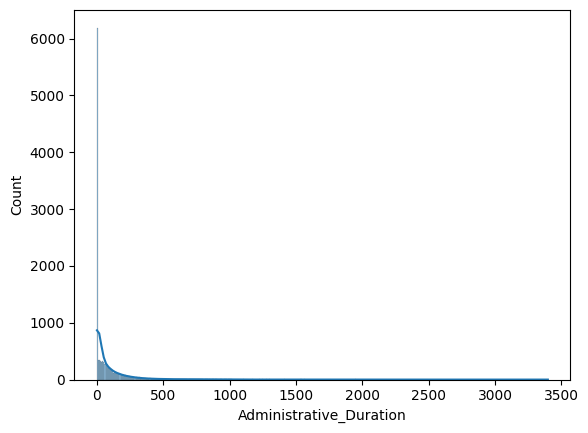

In [14]:
sns.histplot(data = df['Administrative_Duration'], kde = True)

Распределение с длинным хвостом, основная часть юзеров не переходит на данную страницу или моментально выходят.

In [20]:
#посмотрим на 99 процентил
t = df['Administrative_Duration'].quantile(0.99)
t

830.5870409259969

In [24]:
df[df['Administrative_Duration'] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8301,8,993.083333,1,28.500000,90,2776.013582,0.002381,0.017257,0.000000,0.0,Nov,3,2,3,2,Returning_Visitor,True,False
2446,2,1687.500000,0,0.000000,29,3098.033333,0.000000,0.025806,0.000000,0.0,May,2,4,5,3,Returning_Visitor,False,False
6898,14,1097.016667,1,291.200000,68,4100.255455,0.007632,0.025614,18.427406,0.0,Aug,1,1,3,3,Returning_Visitor,False,False
8548,12,1106.389831,9,627.458333,125,7444.938071,0.007701,0.022386,7.201209,0.0,Nov,3,2,4,2,Returning_Visitor,False,True
10000,9,965.500000,0,0.000000,30,1895.133333,0.005405,0.011186,0.000000,0.0,Dec,3,2,3,2,Returning_Visitor,True,False


Возможно в данных есть ошибка, большые выбросы, 1% юзеров находились на странице более 800 секунд. Некорректный замер времени

<Axes: xlabel='Administrative_Duration', ylabel='Count'>

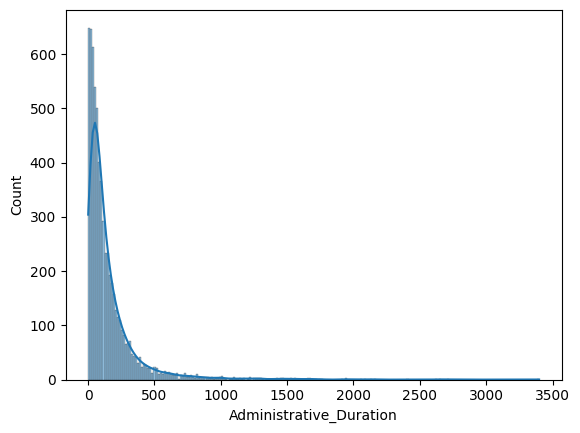

In [25]:
#исключим нулевые значение и заново построим гистограмму
t = df[df['Administrative_Duration'] != 0]
sns.histplot(data = t['Administrative_Duration'], kde = True)

Убрав нули можно увидеть лог нормальное распределение, основная часть клиентов не задерживается на странице более 800 сек.

In [58]:
# Посмотрим связь с целевой переменной
X = df[['Administrative_Duration']] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [74]:
accuracy_score(y, y_pred)

0.8441200324412004

In [75]:
confusion_matrix(y ,y_pred)

array([[10404,    18],
       [ 1904,     4]])

In [76]:
print(classification_report(y ,y_pred))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92     10422
        True       0.18      0.00      0.00      1908

    accuracy                           0.84     12330
   macro avg       0.51      0.50      0.46     12330
weighted avg       0.74      0.84      0.77     12330



In [78]:
# посмотрим сбалансированность классов
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

таргет сильно не сбалансированые, если посмотреть очень низский  precision 0.18, модель плохо предсказывает

#Колонка Administrative

In [81]:
df['Administrative'].sample(5)

7176    9
5716    8
861     0
1629    8
2243    4
Name: Administrative, dtype: int64

<Axes: xlabel='Administrative', ylabel='Count'>

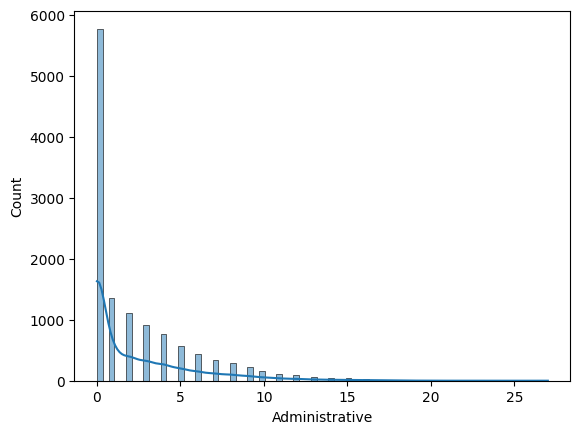

In [83]:
sns.histplot(data = df['Administrative'], kde = True)

In [84]:
#посмотрим на выбросы
t = df['Administrative'].quantile(0.99)
t

14.0

In [86]:
df[df['Administrative'] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9959,17,446.933333,8,597.583333,62,2350.667857,0.007453,0.033987,79.484039,0.0,Dec,1,1,7,10,Returning_Visitor,False,False
10941,16,485.906593,2,19.000000,42,753.637363,0.000000,0.011569,31.636841,0.0,Nov,2,2,1,8,Returning_Visitor,False,True
6674,19,341.816667,1,51.400000,429,9661.585763,0.003044,0.012547,3.459384,0.0,Sep,2,2,9,1,Returning_Visitor,False,False
8308,27,853.735949,2,126.500000,584,24844.156200,0.002099,0.009347,4.511100,0.0,Nov,2,4,3,8,Returning_Visitor,False,False
7689,14,574.451191,0,0.000000,41,2688.864762,0.000000,0.011853,36.962205,0.0,Sep,3,2,3,4,Returning_Visitor,False,True


<Axes: xlabel='Administrative', ylabel='Revenue'>

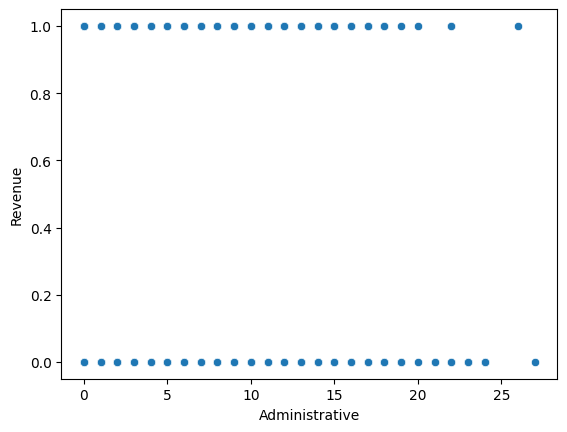

In [92]:
sns.scatterplot(x='Administrative',y='Revenue',data=df)

Нет зависимости между Administrative и Revenue

In [93]:
# Посмотрим связь с целевой переменной
X = df[['Administrative']] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [95]:
accuracy_score(y, y_pred)

0.8445255474452554

In [96]:
confusion_matrix(y ,y_pred)

array([[10410,    12],
       [ 1905,     3]])

In [97]:
print(classification_report(y ,y_pred))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92     10422
        True       0.20      0.00      0.00      1908

    accuracy                           0.84     12330
   macro avg       0.52      0.50      0.46     12330
weighted avg       0.75      0.84      0.77     12330



Administrative так же плохо предсказывает данные

#Колонка Informational

In [98]:
df['Informational'].sample(5)

9711    0
6439    0
1299    0
2823    0
7006    0
Name: Informational, dtype: int64

<Axes: xlabel='Informational', ylabel='Count'>

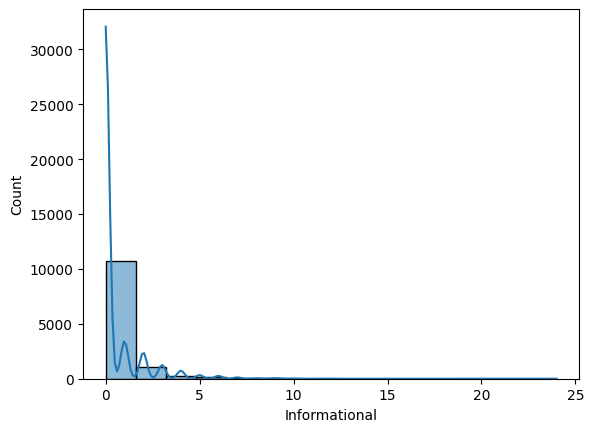

In [99]:
sns.histplot(data = df['Informational'], kde = True)

<Axes: xlabel='Informational', ylabel='Count'>

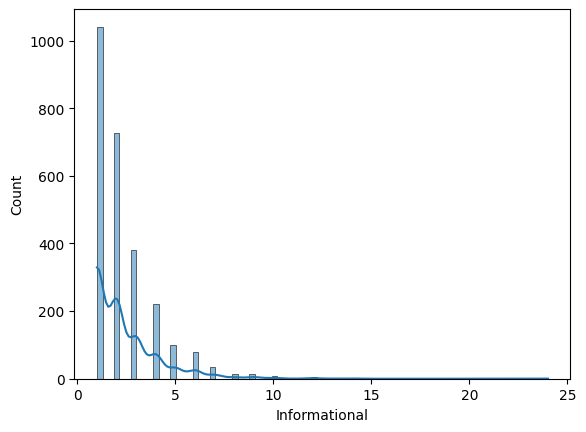

In [100]:
#исключим нулевые значение и заново построим гистограмму
t = df[df['Informational'] != 0]
sns.histplot(data = t['Informational'], kde = True)

<Axes: xlabel='Informational', ylabel='Revenue'>

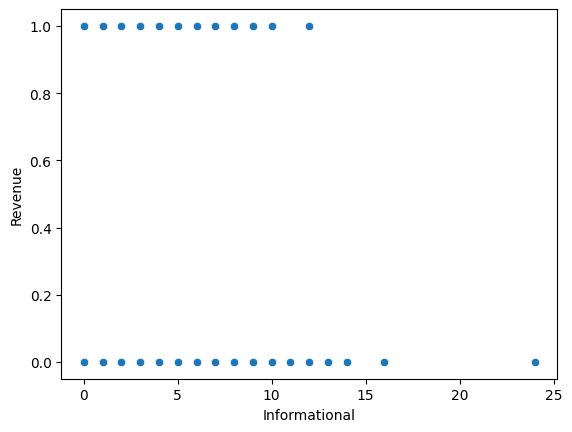

In [101]:
sns.scatterplot(x='Informational',y='Revenue',data=df)

In [107]:
# Посмотрим связь с целевой переменной
X = df[['Informational']] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [109]:
accuracy_score(y, y_pred)

0.8446877534468775

In [110]:
confusion_matrix(y ,y_pred)

array([[10413,     9],
       [ 1906,     2]])

In [111]:
print(classification_report(y ,y_pred))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92     10422
        True       0.18      0.00      0.00      1908

    accuracy                           0.84     12330
   macro avg       0.51      0.50      0.46     12330
weighted avg       0.74      0.84      0.77     12330



#Колонка Informational Duration

In [116]:
col = 'Informational_Duration'

In [117]:
df[col].sample(5)

1080     0.0
7787     0.0
8940     0.0
10631    0.0
5784     0.0
Name: Informational_Duration, dtype: float64

<Axes: xlabel='Informational_Duration', ylabel='Count'>

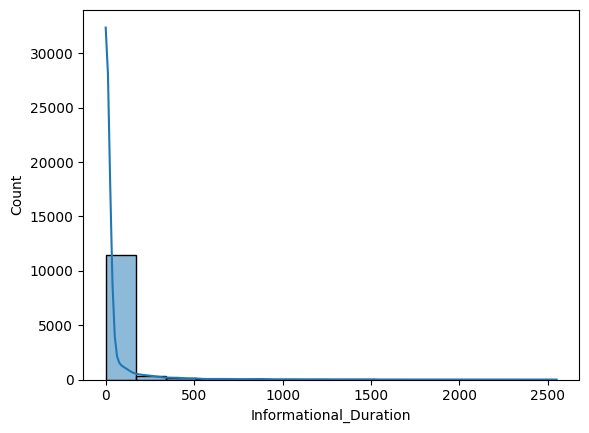

In [118]:
sns.histplot(data = df[col], kde = True)

In [119]:
#посмотрим на выбросы
t = df[col].quantile(0.99)
t

722.7860000000003

In [120]:
df[df[col] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3713,7,190.583333,2,1131.000000,46,5492.366667,0.019091,0.043948,8.567143,0.0,May,2,6,6,6,Returning_Visitor,False,False
11332,1,7.125000,6,1043.928571,73,3585.177579,0.008175,0.024452,0.000000,0.0,Nov,3,2,5,2,Returning_Visitor,False,False
8016,2,21.000000,1,802.500000,48,2073.916667,0.003922,0.026275,0.000000,0.0,Nov,2,2,3,2,Returning_Visitor,True,False
6671,7,186.666667,7,790.006667,57,1720.444748,0.000980,0.007866,3.801048,0.0,Sep,3,2,6,2,Returning_Visitor,True,False
2561,9,169.500000,2,724.000000,31,706.983766,0.005714,0.023762,0.000000,0.0,May,1,1,1,1,Returning_Visitor,False,False


In [122]:
df[df[col] >= 2500]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8071,5,3398.75,6,2549.375,449,63973.52223,0.000764,0.027701,0.0,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


<Axes: xlabel='Informational_Duration', ylabel='Count'>

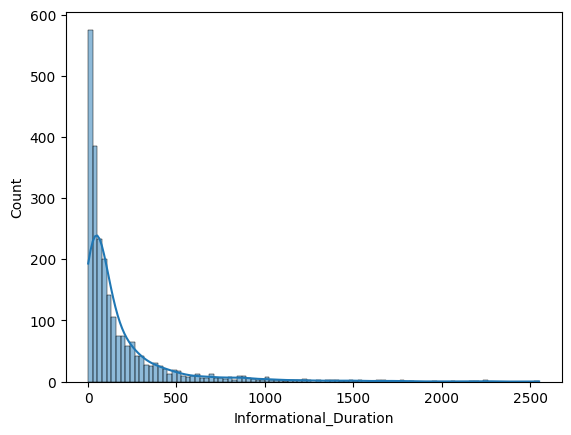

In [123]:
#исключим нулевые значение и заново построим гистограмму
t = df[df[col] != 0]
sns.histplot(data = t[col], kde = True)

<Axes: xlabel='Informational_Duration', ylabel='Revenue'>

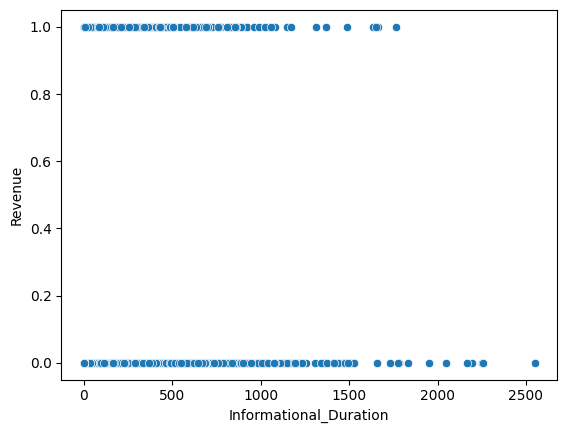

In [124]:
sns.scatterplot(x=col,y='Revenue',data=df)

In [125]:
# Замена пропущенных значений медианым значениями
df[col].fillna(df[col].quantile(0.50), inplace=True)

In [126]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [128]:
accuracy_score(y, y_pred)

0.8444444444444444

In [129]:
confusion_matrix(y ,y_pred)

array([[10411,    11],
       [ 1907,     1]])

In [130]:
print(classification_report(y ,y_pred))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92     10422
        True       0.08      0.00      0.00      1908

    accuracy                           0.84     12330
   macro avg       0.46      0.50      0.46     12330
weighted avg       0.73      0.84      0.77     12330



модели не может обнаруживать выборки, относящиеся к классу Positive.

#Колонка Product Related

In [133]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [134]:
col = 'ProductRelated'

In [135]:
df[col].sample(5)

6086     377
7521      56
5921       9
6928      48
11167      2
Name: ProductRelated, dtype: int64

<Axes: xlabel='ProductRelated', ylabel='Count'>

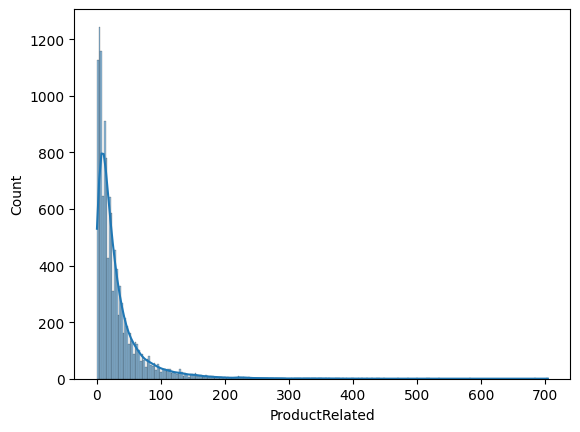

In [136]:
sns.histplot(data = df[col], kde = True)

In [137]:
#посмотрим на выбросы
t = df[col].quantile(0.99)
t

221.0

In [138]:
df[df[col] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8929,6,69.125000,2,13.000000,227,6854.604365,0.005702,0.020961,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
5845,11,603.800000,2,102.750000,305,5018.328289,0.001608,0.005626,0.000000,0.0,Oct,3,2,6,3,Returning_Visitor,False,False
10481,4,80.000000,0,0.000000,326,11945.629540,0.001850,0.017528,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
11512,8,109.571429,0,0.000000,374,12499.377110,0.001989,0.010782,6.420746,0.0,Nov,2,2,2,2,Returning_Visitor,True,False
11535,1,0.000000,4,154.833333,224,5209.958128,0.008312,0.021845,0.000000,0.0,Nov,1,2,3,2,Returning_Visitor,False,True


In [139]:
df[df[col] >= 700]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5152,17,2629.253968,24,2050.433333,705,43171.23338,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False


<Axes: xlabel='ProductRelated', ylabel='Count'>

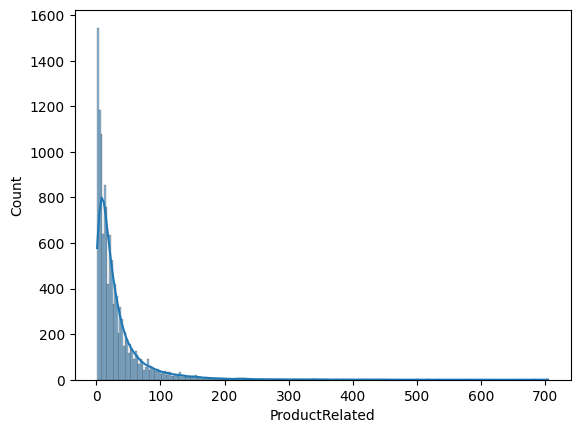

In [140]:
#исключим нулевые значение и заново построим гистограмму
t = df[df[col] != 0]
sns.histplot(data = t[col], kde = True)

<Axes: xlabel='ProductRelated', ylabel='Revenue'>

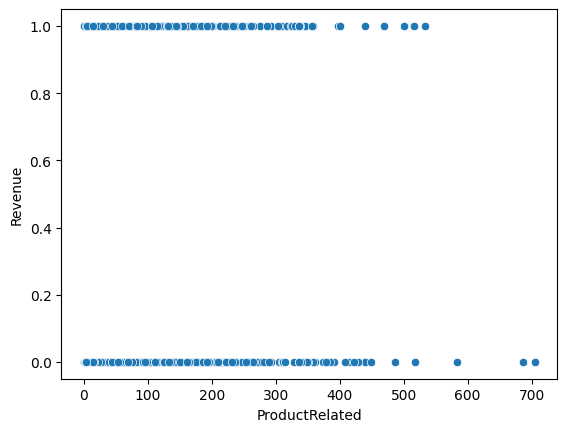

In [141]:
sns.scatterplot(x=col,y='Revenue',data=df)

In [142]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [143]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [144]:
accuracy_score(y, y_pred)

0.84330900243309

In [145]:
confusion_matrix(y ,y_pred)

array([[10374,    48],
       [ 1884,    24]])

In [146]:
print(classification_report(y ,y_pred))

              precision    recall  f1-score   support

       False       0.85      1.00      0.91     10422
        True       0.33      0.01      0.02      1908

    accuracy                           0.84     12330
   macro avg       0.59      0.50      0.47     12330
weighted avg       0.77      0.84      0.78     12330



Колонка чуть лучше предсказывает precision,  recall также очень низкий

#Колонка ProductRelated_Duration

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [147]:
col = 'ProductRelated_Duration'

In [148]:
df[col].sample(5)

6219     2007.206667
8861      531.500000
4951      249.000000
7965      438.383333
10683    2849.482143
Name: ProductRelated_Duration, dtype: float64

<Axes: xlabel='ProductRelated_Duration', ylabel='Count'>

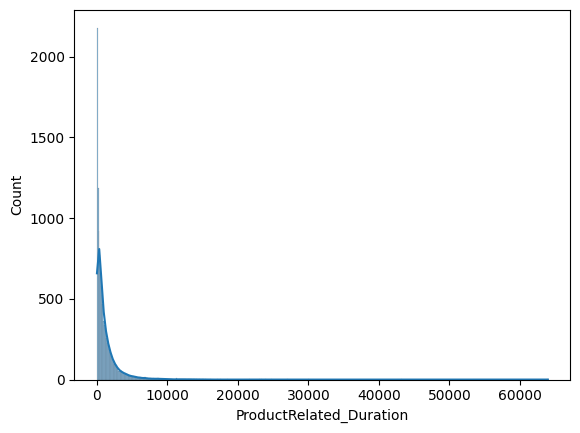

In [149]:
sns.histplot(data = df[col], kde = True)

In [150]:
#посмотрим на выбросы
t = df[col].quantile(0.99)
t

8693.926046840012

In [151]:
df[df[col] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8230,7,82.766667,1,47.000000,391,15025.233020,0.001515,0.010141,1.271407,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
10481,4,80.000000,0,0.000000,326,11945.629540,0.001850,0.017528,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
11713,5,107.666667,10,505.166667,281,14988.591510,0.008499,0.029697,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
11555,7,191.000000,0,0.000000,237,8956.097502,0.003094,0.012110,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,False
6992,13,314.610714,0,0.000000,358,9760.690488,0.000831,0.004094,0.000000,0.0,June,3,2,5,1,Returning_Visitor,False,False


In [152]:
df[df[col] >= 60000]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8071,5,3398.75,6,2549.375,449,63973.52223,0.000764,0.027701,0.0,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


<Axes: xlabel='ProductRelated_Duration', ylabel='Count'>

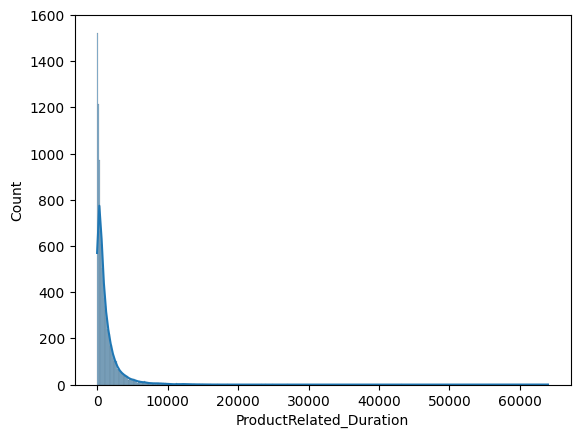

In [155]:
#исключим нулевые значение и заново построим гистограмму
t = df[df[col] != 0]
sns.histplot(data = t[col], kde = True)

<Axes: xlabel='ProductRelated_Duration', ylabel='Revenue'>

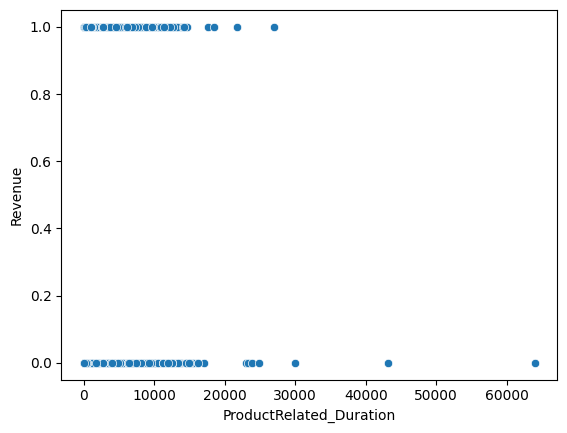

In [154]:
sns.scatterplot(x=col,y='Revenue',data=df)

Видно 4 больших выброса в данных

In [156]:
# Замена пропущенных значений медианым значениями
df[col].fillna(df[col].quantile(0.50), inplace=True)

In [157]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [158]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [159]:
accuracy_score(y, y_pred)

0.8440389294403893

In [160]:
confusion_matrix(y ,y_pred)

array([[10382,    40],
       [ 1883,    25]])

In [161]:
print(classification_report(y ,y_pred))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92     10422
        True       0.38      0.01      0.03      1908

    accuracy                           0.84     12330
   macro avg       0.62      0.50      0.47     12330
weighted avg       0.78      0.84      0.78     12330



#Колонка BounceRates

In [164]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [165]:
col = 'BounceRates'

In [166]:
df[col].sample(5)

1552    0.000000
8274    0.000000
9509    0.001429
9433    0.039464
2235    0.200000
Name: BounceRates, dtype: float64

<Axes: xlabel='BounceRates', ylabel='Count'>

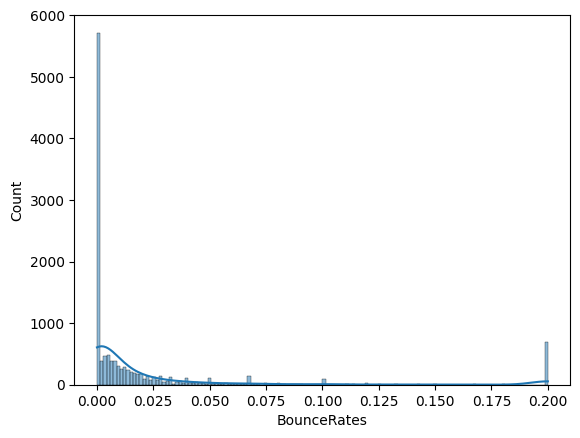

In [167]:
sns.histplot(data = df[col], kde = True)

In [168]:
#посмотрим на выбросы
t = df[col].quantile(0.99)
t

0.2

In [169]:
df[df[col] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1475,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1498,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,7,1,Returning_Visitor,True,False
3173,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,1,1,2,2,Returning_Visitor,False,False
7429,0,0.0,0,0.0,4,0.0,0.2,0.2,0.0,0.0,Jul,3,2,1,13,Returning_Visitor,False,False
9819,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,6,2,Returning_Visitor,True,False


<Axes: xlabel='BounceRates', ylabel='Count'>

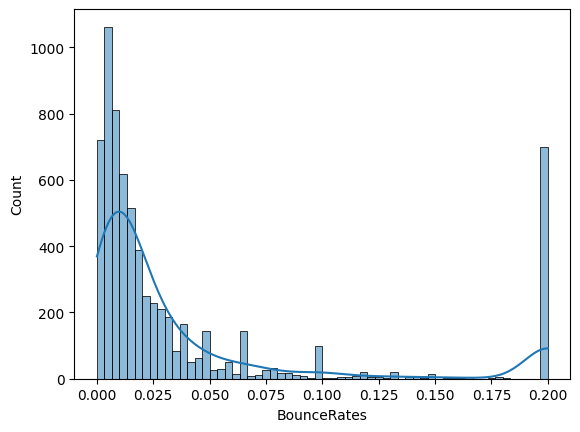

In [170]:
#исключим нулевые значение и заново построим гистограмму
t = df[df[col] != 0]
sns.histplot(data = t[col], kde = True)

Данные ограничены диапазоном от 0 до 0.2. Большое кол-во равно 0.2

<Axes: xlabel='BounceRates', ylabel='Revenue'>

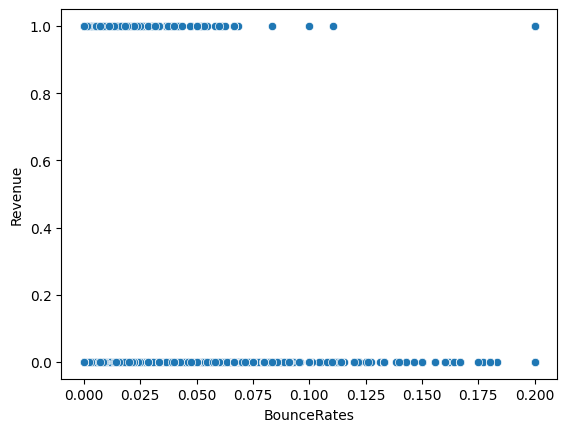

In [171]:
sns.scatterplot(x=col,y='Revenue',data=df)

В основном позитивный Revenue до 0.08

In [172]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [173]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [174]:
accuracy_score(y, y_pred)

0.8452554744525548

In [175]:
confusion_matrix(y ,y_pred)

array([[10422,     0],
       [ 1908,     0]])

In [176]:
print(classification_report(y ,y_pred))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92     10422
        True       0.00      0.00      0.00      1908

    accuracy                           0.85     12330
   macro avg       0.42      0.50      0.46     12330
weighted avg       0.71      0.85      0.77     12330



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Колонка ExitRates

In [201]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [202]:
col = 'ExitRates'

In [204]:
df[col].sample(5)

7943     0.150000
11293    0.008696
3792     0.059524
6807     0.031111
9990     0.020000
Name: ExitRates, dtype: float64

<Axes: xlabel='ExitRates', ylabel='Count'>

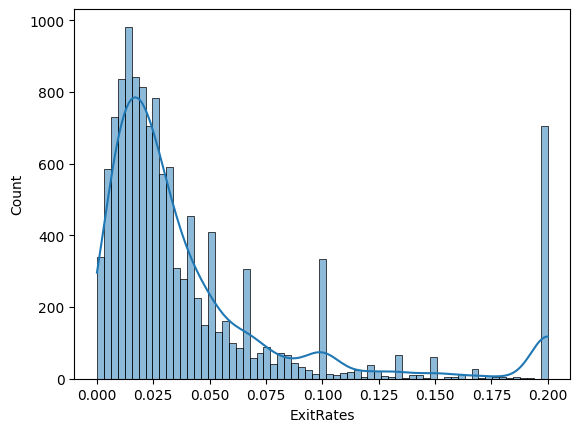

In [205]:
sns.histplot(data = df[col], kde = True)

In [206]:
#посмотрим на выбросы
t = df[col].quantile(0.99)
t

0.2

In [207]:
df[df[col] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2680,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,6,2,3,5,Returning_Visitor,False,False
181,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.6,Feb,4,2,1,3,Returning_Visitor,False,False
12116,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,2,10,3,1,Returning_Visitor,False,False
9187,0,0.0,0,0.0,3,0.0,0.2,0.2,0.0,0.0,Nov,1,8,9,1,Returning_Visitor,True,False
3288,1,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.4,May,1,1,1,2,Returning_Visitor,False,False


<Axes: xlabel='ExitRates', ylabel='Count'>

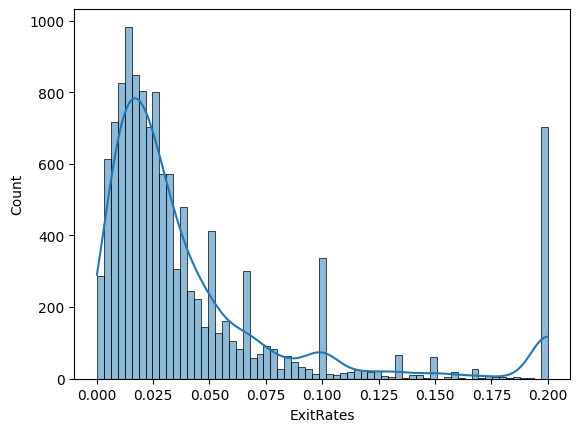

In [208]:
#исключим нулевые значение и заново построим гистограмму
t = df[df[col] != 0]
sns.histplot(data = t[col], kde = True)

Данные ограничены диапазоном от 0 до 0.2. Большое кол-во равно 0.2

<Axes: xlabel='ExitRates', ylabel='Revenue'>

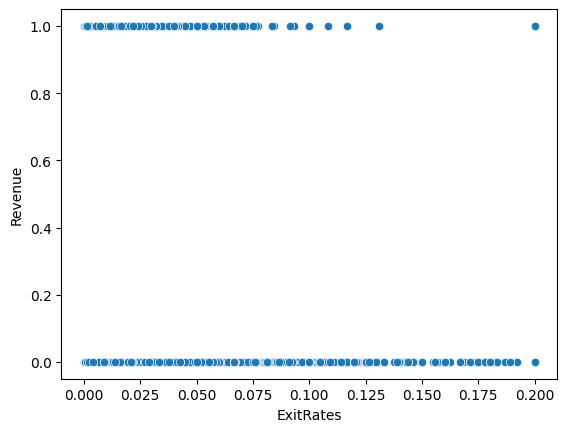

In [209]:
sns.scatterplot(x=col,y='Revenue',data=df)

В основном позитивный Revenue до 0.08

In [210]:
# Замена пропущенных значений медианым значениями
df[col].fillna(df[col].quantile(0.50), inplace=True)

In [211]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [212]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [213]:
accuracy_score(y, y_pred)

0.8452554744525548

In [214]:
confusion_matrix(y ,y_pred)

array([[10422,     0],
       [ 1908,     0]])

In [215]:
print(classification_report(y ,y_pred))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92     10422
        True       0.00      0.00      0.00      1908

    accuracy                           0.85     12330
   macro avg       0.42      0.50      0.46     12330
weighted avg       0.71      0.85      0.77     12330



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Колонка PageValues

In [216]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [217]:
col = 'PageValues'

In [218]:
df[col].sample(5)

9706    0.0
6901    0.0
861     0.0
7633    0.0
511     0.0
Name: PageValues, dtype: float64

<Axes: xlabel='PageValues', ylabel='Count'>

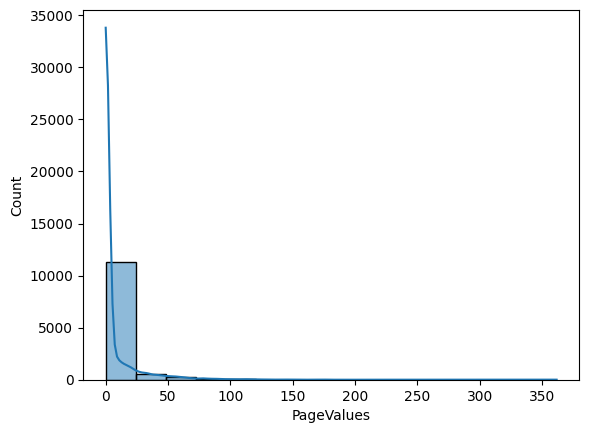

In [219]:
sns.histplot(data = df[col], kde = True)

In [220]:
#посмотрим на выбросы
t = df[col].quantile(0.99)
t

85.49849043159924

In [221]:
df[df[col] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2412,0,0.0,0,0.0,12,499.000000,0.0,0.018182,86.388000,0.0,May,2,2,6,2,New_Visitor,True,True
10834,0,0.0,0,0.0,47,3650.316667,0.0,0.003333,97.196574,0.0,Nov,2,2,1,10,Returning_Visitor,False,True
9239,3,37.5,0,0.0,18,607.500000,0.0,0.010526,361.763742,0.0,Nov,2,2,3,2,New_Visitor,False,True
1050,1,21.0,1,61.0,49,1647.152381,0.0,0.000800,144.393489,0.0,Mar,2,2,7,2,Returning_Visitor,True,True
10654,0,0.0,0,0.0,53,3575.000000,0.0,0.003846,119.894333,0.0,Nov,2,5,6,2,Returning_Visitor,False,True


<Axes: xlabel='PageValues', ylabel='Count'>

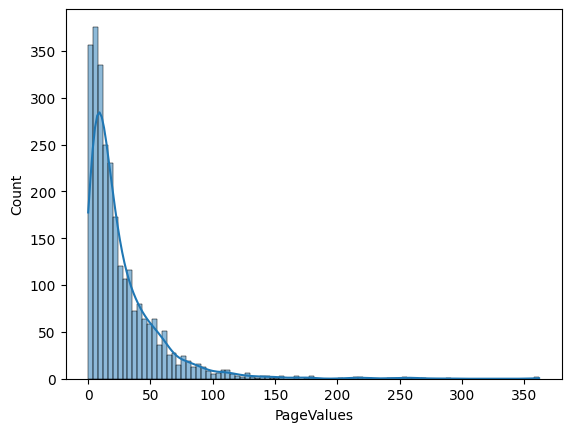

In [222]:
#исключим нулевые значение и заново построим гистограмму
t = df[df[col] != 0]
sns.histplot(data = t[col], kde = True)

Данные ограничены диапазоном от 0 до 0.2. Большое кол-во равно 0.2

<Axes: xlabel='PageValues', ylabel='Revenue'>

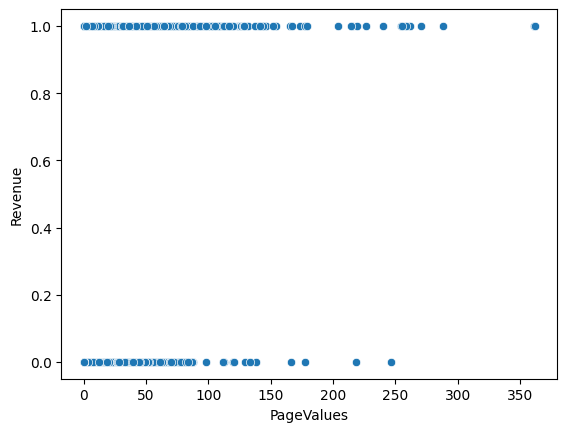

In [223]:
sns.scatterplot(x=col,y='Revenue',data=df)

In [224]:
# Замена пропущенных значений медианым значениями
df[col].fillna(df[col].quantile(0.50), inplace=True)

In [225]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [226]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [227]:
accuracy_score(y, y_pred)

0.883617193836172

In [228]:
confusion_matrix(y ,y_pred)

array([[10208,   214],
       [ 1221,   687]])

In [229]:
print(classification_report(y ,y_pred))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93     10422
        True       0.76      0.36      0.49      1908

    accuracy                           0.88     12330
   macro avg       0.83      0.67      0.71     12330
weighted avg       0.87      0.88      0.87     12330



Колонка PageValues лучше предсказывает таргер колонку

#Колонка SpecialDay

In [253]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [254]:
col = 'SpecialDay'

In [255]:
df[col].sample(5)

5125    0.0
4003    0.0
1300    0.0
4005    0.0
9254    0.0
Name: SpecialDay, dtype: float64

<Axes: xlabel='SpecialDay', ylabel='Count'>

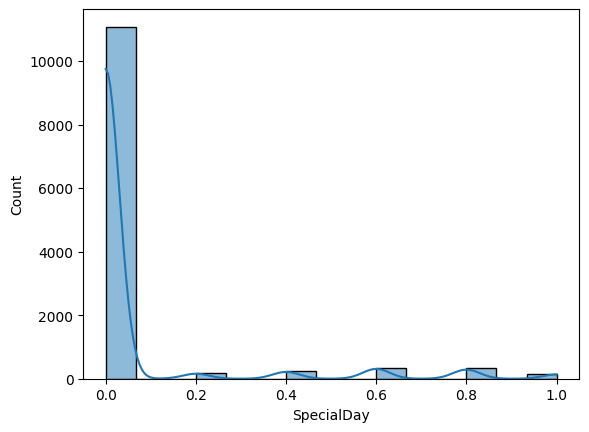

In [256]:
sns.histplot(data = df[col], kde = True)

In [257]:
#посмотрим на выбросы
t = df[col].quantile(0.99)
t

1.0

In [258]:
df[df[col] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3358,0,0.000000,0,0.0,24,485.283974,0.004938,0.039283,0.000000,1.0,May,2,2,2,4,Returning_Visitor,True,False
5204,0,0.000000,0,0.0,9,193.666667,0.007407,0.047619,0.000000,1.0,May,1,8,7,4,Returning_Visitor,True,False
5031,10,154.791667,2,7.0,49,1714.868651,0.013711,0.055127,1.456952,1.0,May,1,1,1,2,Returning_Visitor,True,False
3669,1,0.000000,1,313.0,6,135.500000,0.028571,0.085714,0.000000,1.0,May,2,2,7,2,Returning_Visitor,True,False
5094,8,85.500000,0,0.0,41,1135.860714,0.000000,0.025876,11.876914,1.0,May,2,2,1,2,Returning_Visitor,True,False


<Axes: xlabel='SpecialDay', ylabel='Count'>

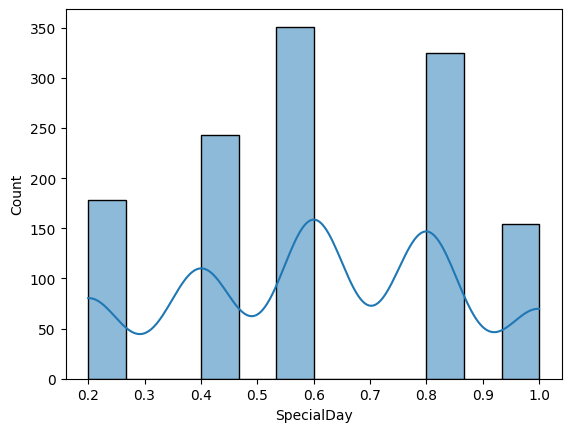

In [259]:
#исключим нулевые значение и заново построим гистограмму
t = df[df[col] != 0]
sns.histplot(data = t[col], kde = True)

если исключить ноль распределение ближе к нормальному

<Axes: xlabel='SpecialDay', ylabel='Revenue'>

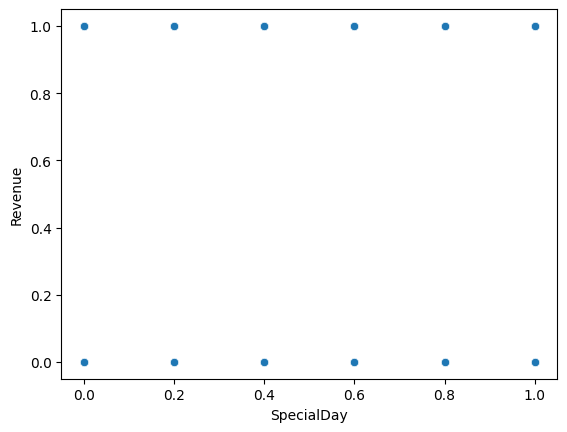

In [260]:
sns.scatterplot(x=col,y='Revenue',data=df)

In [261]:
# Замена пропущенных значений медианым значениями
df[col].fillna(df[col].quantile(0.50), inplace=True)

In [262]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [263]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [264]:
accuracy_score(y, y_pred)

0.8452554744525548

In [265]:
confusion_matrix(y ,y_pred)

array([[10422,     0],
       [ 1908,     0]])

In [266]:
print(classification_report(y ,y_pred))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92     10422
        True       0.00      0.00      0.00      1908

    accuracy                           0.85     12330
   macro avg       0.42      0.50      0.46     12330
weighted avg       0.71      0.85      0.77     12330



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


модель плохо предсказывает данные

#Колонка Month

In [267]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [268]:
col = 'Month'

In [269]:
df[col].sample(5)

9362     Nov
11524    Dec
6897     Aug
8933     Dec
6458     Aug
Name: Month, dtype: object

In [275]:
df[col].value_counts()

May     3348
Nov     2980
Mar     1897
Dec     1713
Oct      545
Sep      446
Aug      431
Jul      429
June     288
Feb      183
aug       70
Name: Month, dtype: int64

Дублируется август, написание разное

In [277]:
df[col] = df[col].apply(lambda x: 'Aug' if x == 'aug' else x)

<Axes: xlabel='Month', ylabel='Count'>

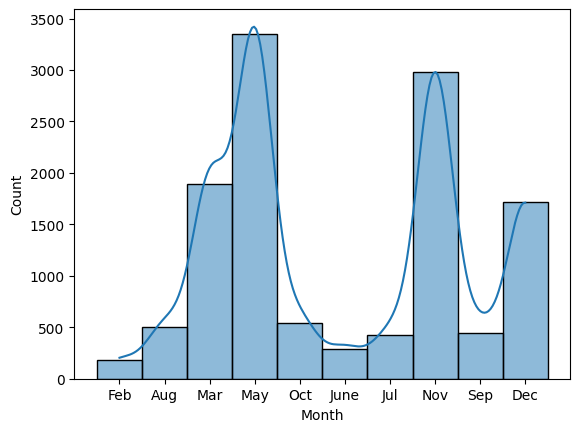

In [279]:
sns.histplot(data = df[col], kde = True)

<Axes: xlabel='Month', ylabel='Revenue'>

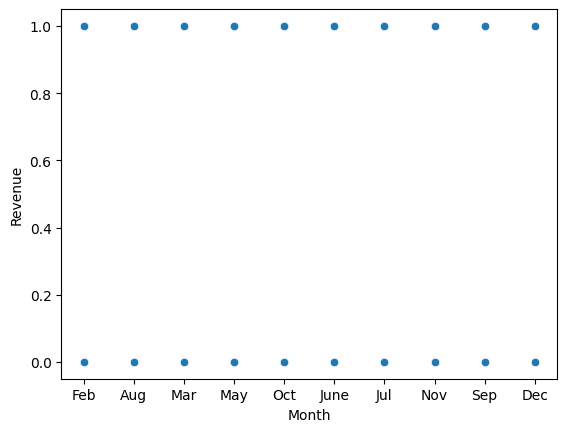

In [280]:
sns.scatterplot(x=col,y='Revenue',data=df)

#Колонка OperatingSystems

In [281]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [282]:
col = 'OperatingSystems'

In [283]:
df[col].sample(5)

1257    2
315     1
6673    2
2908    2
2524    2
Name: OperatingSystems, dtype: int64

<Axes: xlabel='OperatingSystems', ylabel='Count'>

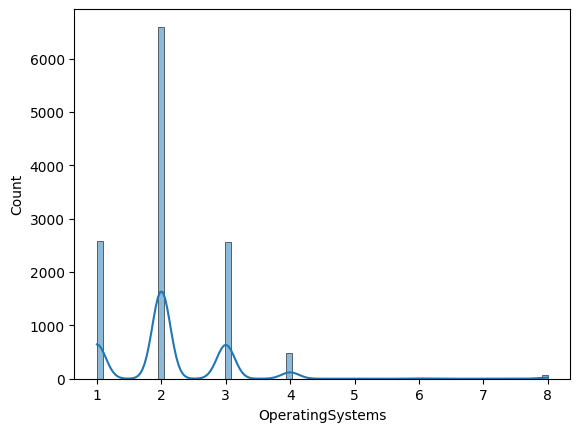

In [284]:
sns.histplot(data = df[col], kde = True)

In [285]:
#посмотрим на выбросы
t = df[col].quantile(0.99)
t

4.0

In [286]:
df[df[col] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6696,2,46.400000,0,0.0,8,349.000000,0.020000,0.080000,0.000000,0.0,Aug,4,1,1,1,Returning_Visitor,False,False
2754,0,0.000000,0,0.0,7,82.000000,0.000000,0.057143,0.000000,0.0,May,4,1,1,3,Returning_Visitor,False,False
7679,7,73.233333,1,0.0,310,7710.731416,0.000039,0.007511,0.098621,0.0,Jul,4,1,1,4,Returning_Visitor,False,True
675,2,25.000000,0,0.0,20,667.916667,0.000000,0.009524,18.584762,0.0,Mar,4,1,1,3,Returning_Visitor,False,False
4859,1,4.000000,0,0.0,50,549.916667,0.000000,0.008163,0.000000,0.0,May,4,1,1,4,Returning_Visitor,False,False


если исключить ноль распределение ближе к нормальному

<Axes: xlabel='OperatingSystems', ylabel='Revenue'>

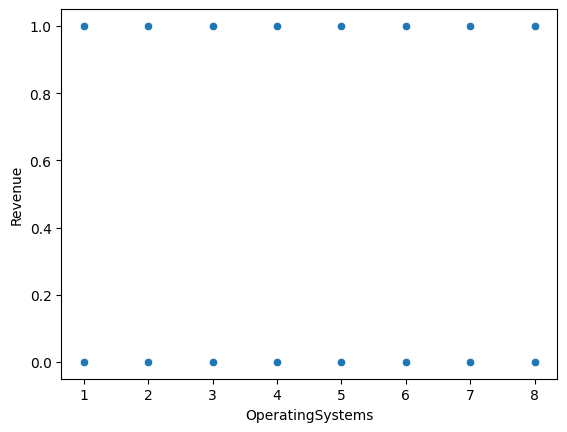

In [288]:
sns.scatterplot(x=col,y='Revenue',data=df)

In [289]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [290]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [291]:
accuracy_score(y, y_pred)

0.8452554744525548

In [292]:
confusion_matrix(y ,y_pred)

array([[10422,     0],
       [ 1908,     0]])

#Колонка Browser

In [293]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [294]:
col = 'Browser'

In [295]:
df[col].sample(5)

10920    2
3471     2
5216     8
2189     2
8801     1
Name: Browser, dtype: int64

<Axes: xlabel='Browser', ylabel='Count'>

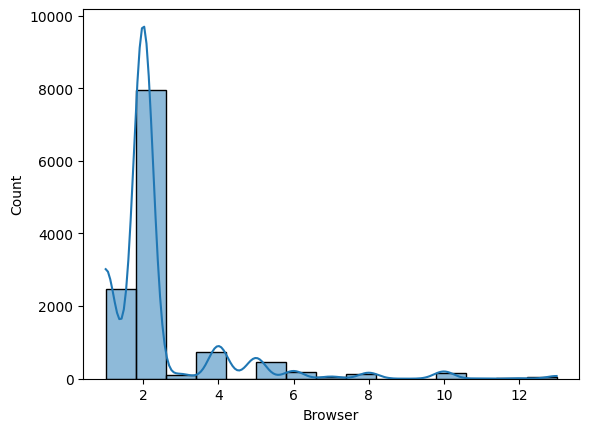

In [296]:
sns.histplot(data = df[col], kde = True)

Определенным браузером пользуются больше всего

In [297]:
#посмотрим на выбросы
t = df[col].quantile(0.99)
t

10.0

In [298]:
df[df[col] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
7690,2,72.600000,1,15.2,6,425.000000,0.000000,0.025000,0.0,0.0,Jul,2,10,1,4,Returning_Visitor,True,False
551,0,0.000000,0,0.0,9,597.625000,0.022222,0.066667,0.0,0.0,Mar,2,10,4,3,Returning_Visitor,False,False
9125,3,46.000000,0,0.0,59,3478.750000,0.000000,0.013559,0.0,0.0,Nov,2,10,3,1,Returning_Visitor,True,False
9805,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Dec,8,13,9,20,Other,False,False
8003,3,77.333333,2,7.0,24,1051.291667,0.000000,0.014815,0.0,0.0,Dec,2,13,9,20,Returning_Visitor,False,False


<Axes: xlabel='Browser', ylabel='Revenue'>

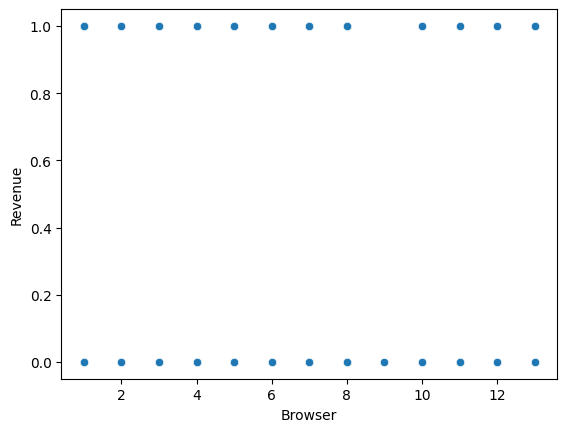

In [299]:
sns.scatterplot(x=col,y='Revenue',data=df)

In [300]:
# Замена пропущенных значений медианым значениями
df[col].fillna(df[col].quantile(0.50), inplace=True)

In [301]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [302]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [303]:
accuracy_score(y, y_pred)

0.8452554744525548

In [304]:
confusion_matrix(y ,y_pred)

array([[10422,     0],
       [ 1908,     0]])

#Колонка Region

In [305]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [306]:
col = 'Region'

In [307]:
df[col].sample(5)

4838    1
2589    5
8854    6
6887    3
6936    3
Name: Region, dtype: int64

<Axes: xlabel='Region', ylabel='Count'>

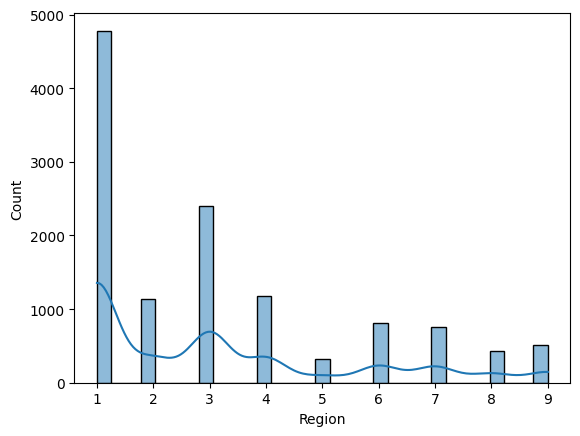

In [308]:
sns.histplot(data = df[col], kde = True)

In [309]:
#посмотрим на выбросы
t = df[col].quantile(0.99)
t

9.0

In [310]:
df[df[col] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4456,3,109.0,0,0.0,11,2351.333333,0.000000,0.025000,0.0,0.0,May,2,2,9,3,Returning_Visitor,True,False
9187,0,0.0,0,0.0,3,0.000000,0.200000,0.200000,0.0,0.0,Nov,1,8,9,1,Returning_Visitor,True,False
7681,2,7.0,0,0.0,40,906.400000,0.000000,0.015238,0.0,0.0,Oct,2,2,9,4,Returning_Visitor,False,False
10040,3,99.0,0,0.0,58,1261.658333,0.000000,0.003452,0.0,0.0,Nov,1,2,9,2,New_Visitor,False,True
8746,0,0.0,0,0.0,47,2493.985714,0.017021,0.032057,0.0,0.0,Dec,2,4,9,1,Returning_Visitor,False,True


<Axes: xlabel='Region', ylabel='Count'>

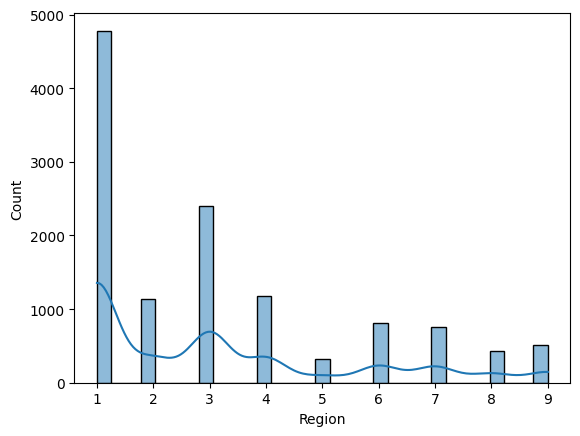

In [311]:
#исключим нулевые значение и заново построим гистограмму
t = df[df[col] != 0]
sns.histplot(data = t[col], kde = True)

<Axes: xlabel='Region', ylabel='Revenue'>

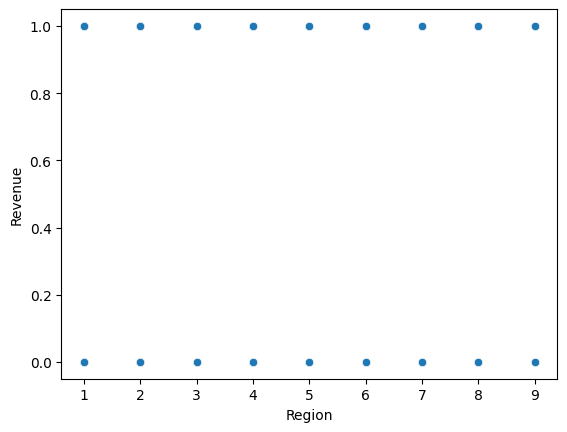

In [312]:
sns.scatterplot(x=col,y='Revenue',data=df)

In [313]:
# Замена пропущенных значений медианым значениями
df[col].fillna(df[col].quantile(0.50), inplace=True)

In [314]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [315]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [316]:
accuracy_score(y, y_pred)

0.8452554744525548

In [317]:
confusion_matrix(y ,y_pred)

array([[10422,     0],
       [ 1908,     0]])

#Колона TrafficType

In [318]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [319]:
col = 'TrafficType'

In [320]:
df[col].sample(5)

6029    13
1608     1
5050     2
6628     1
4773     1
Name: TrafficType, dtype: int64

<Axes: xlabel='TrafficType', ylabel='Count'>

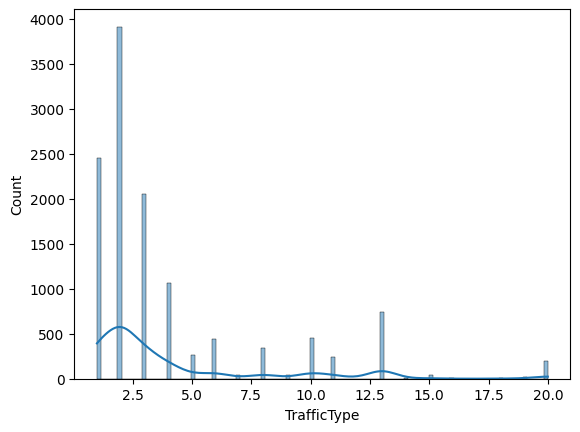

In [321]:
sns.histplot(data = df[col], kde = True)

In [322]:
#посмотрим на выбросы
t = df[col].quantile(0.99)
t

20.0

In [323]:
df[df[col] >= t].sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9351,4,66.0,0,0.0,52,1423.790476,0.005455,0.008485,0.000000,0.0,Dec,2,4,7,20,Returning_Visitor,False,False
4435,0,0.0,1,6.0,50,1306.100000,0.004082,0.012245,5.137714,0.0,May,4,1,4,20,Returning_Visitor,False,True
6526,0,0.0,2,91.2,24,1017.775758,0.052564,0.049225,0.000000,0.0,Nov,2,2,9,20,Returning_Visitor,True,False
8934,0,0.0,0,0.0,6,192.875000,0.000000,0.016667,0.000000,0.0,Dec,8,13,9,20,Other,False,False
5995,0,0.0,0,0.0,9,257.900000,0.011111,0.044444,0.000000,0.0,June,1,1,1,20,Returning_Visitor,True,False


<Axes: xlabel='TrafficType', ylabel='Count'>

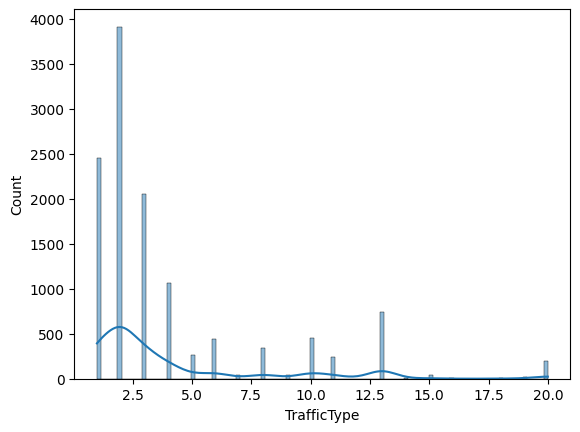

In [325]:
#исключим нулевые значение и заново построим гистограмму
t = df[df[col] != 0]
sns.histplot(data = t[col], kde = True)

<Axes: xlabel='TrafficType', ylabel='Revenue'>

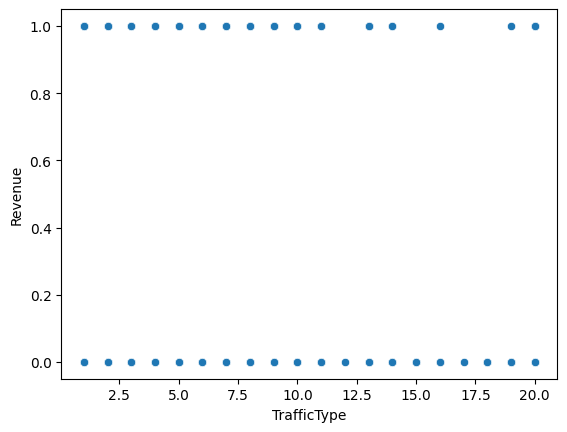

In [326]:
sns.scatterplot(x=col,y='Revenue',data=df)

In [327]:
# Замена пропущенных значений медианым значениями
df[col].fillna(df[col].quantile(0.50), inplace=True)

In [328]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [329]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [330]:
accuracy_score(y, y_pred)

0.8452554744525548

In [331]:
confusion_matrix(y ,y_pred)

array([[10422,     0],
       [ 1908,     0]])

#Колонка VisitorType

In [332]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [333]:
col = 'VisitorType'

In [334]:
df[col].sample(5)

8879           New_Visitor
603      Returning_Visitor
11342    Returning_Visitor
5965     Returning_Visitor
8338     Returning_Visitor
Name: VisitorType, dtype: object

<Axes: xlabel='VisitorType', ylabel='Count'>

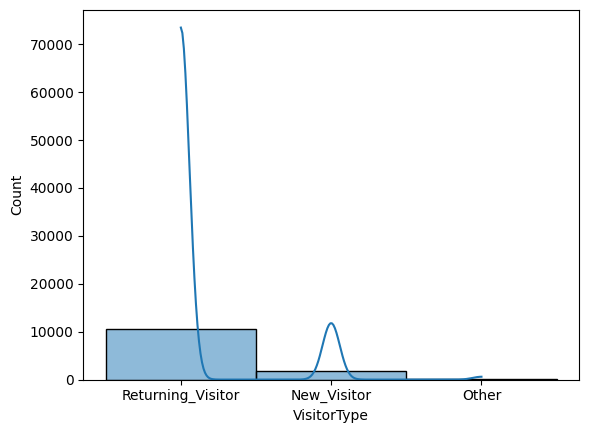

In [335]:
sns.histplot(data = df[col], kde = True)

<Axes: xlabel='VisitorType', ylabel='Revenue'>

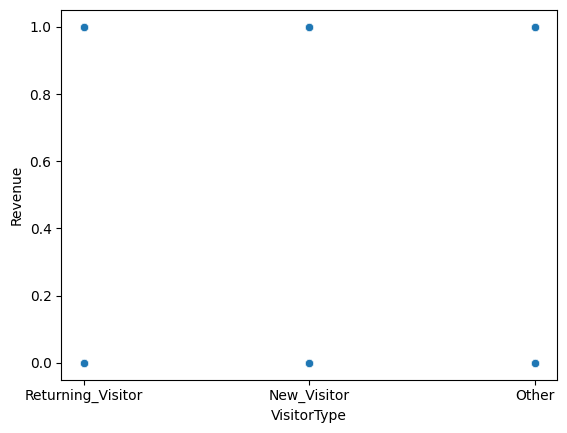

In [336]:
sns.scatterplot(x=col,y='Revenue',data=df)

In [337]:
# Замена пропущенных значений медианым значениями
df[df[col] == 'Other']

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5679,0,0.00,4,225.766667,222,9630.209524,0.053355,0.066159,0.0,0.0,June,8,13,9,5,Other,False,False
8006,5,446.25,0,0.000000,18,815.250000,0.000000,0.002500,0.0,0.0,Dec,8,13,9,20,Other,False,False
8105,0,0.00,0,0.000000,8,493.750000,0.000000,0.050000,0.0,0.0,Nov,2,2,4,20,Other,False,False
8115,0,0.00,0,0.000000,7,87.000000,0.000000,0.028571,0.0,0.0,Dec,8,13,9,20,Other,False,False
8187,0,0.00,0,0.000000,4,129.500000,0.000000,0.050000,0.0,0.0,Dec,8,13,9,20,Other,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12156,0,0.00,0,0.000000,1,0.000000,0.000000,0.100000,0.0,0.0,Dec,8,13,9,20,Other,False,False
12185,0,0.00,0,0.000000,1,0.000000,0.200000,0.200000,0.0,0.0,Dec,8,13,9,20,Other,False,False
12219,0,0.00,0,0.000000,6,199.250000,0.000000,0.033333,0.0,0.0,Dec,2,4,1,3,Other,False,False
12243,3,18.00,0,0.000000,2,8.000000,0.000000,0.050000,0.0,0.0,Dec,8,13,9,20,Other,False,False


#Колонка Weekend

In [339]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [340]:
col = 'Weekend'

In [341]:
df[col].sample(5)

4843     True
1798     True
8691    False
461     False
2685    False
Name: Weekend, dtype: bool

<Axes: xlabel='Weekend', ylabel='Count'>

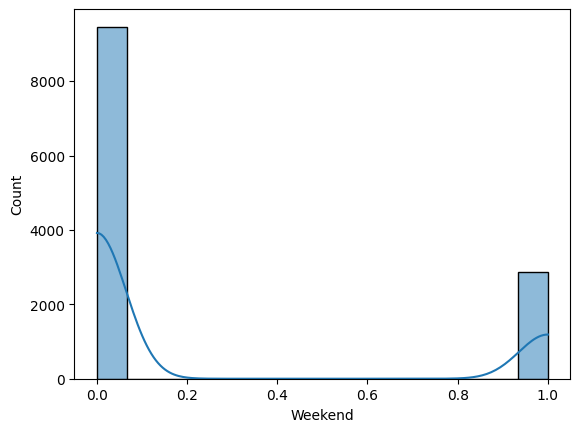

In [342]:
sns.histplot(data = df[col], kde = True)

<Axes: xlabel='Weekend', ylabel='Revenue'>

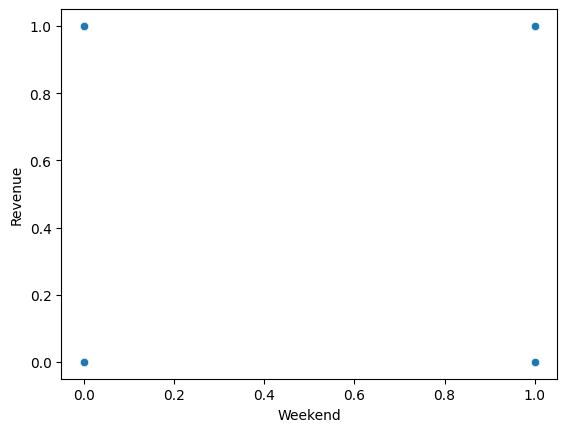

In [344]:
sns.scatterplot(x=col,y='Revenue',data=df)

In [345]:
# Посмотрим связь с целевой переменной
X = df[[col]] # матрица объект-признак
y = df['Revenue'] # целевая переменная

In [346]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

y_pred = clf.predict(X)

In [347]:
accuracy_score(y, y_pred)

0.8452554744525548

In [348]:
confusion_matrix(y ,y_pred)

array([[10422,     0],
       [ 1908,     0]])

#Вывод по однофакторному анализу

Общий вывод по однофакторному анализу, не одного из признаков нет прямой зависемости с тергетом.
Распределение у количественных данных сильно скощено, с длиными схостами. Выбросы не удалил т.к нет четко понимание что ощибка в данных. Возможно чать юзеров так себя ведет.
Каждый отдельный признак плохо прогназирует таргет. Много ошибок позитивного предсказивание.

#Построить матрицу корреляций

<ipython-input-356-f3a1bdfc708f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr() # матрица корреляций


<Axes: >

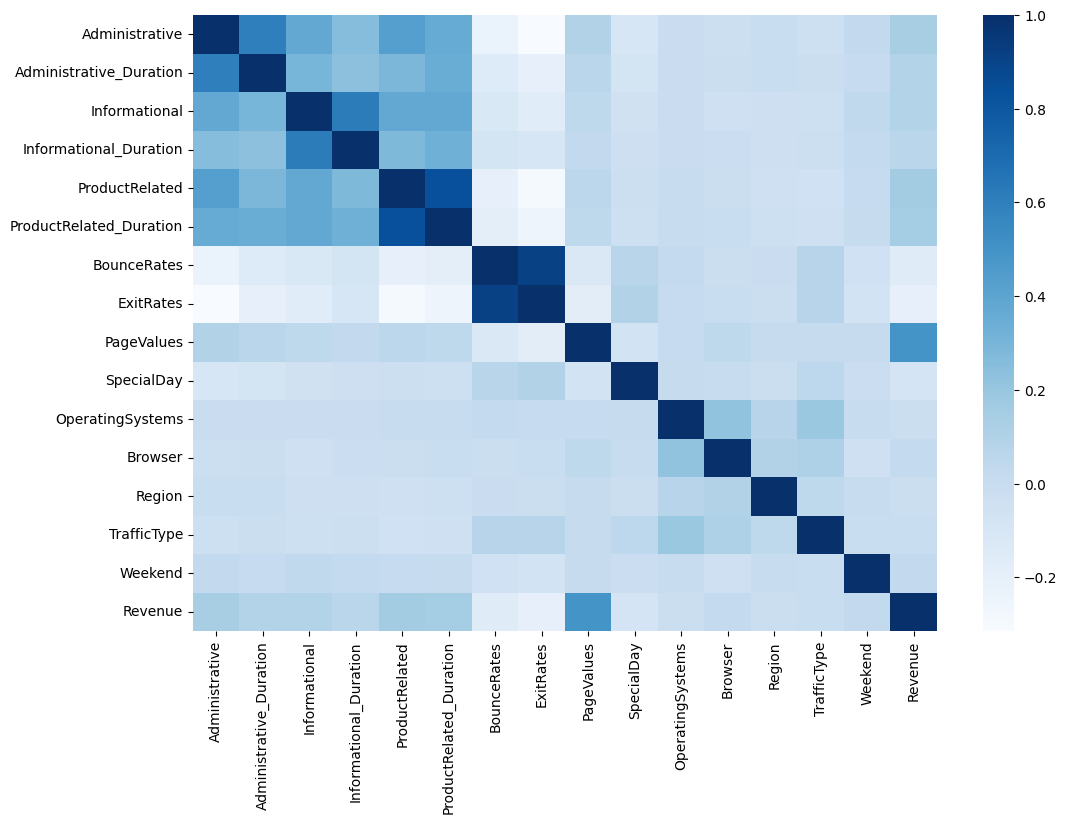

In [356]:
fig = plt.figure(figsize=(12,8),dpi=100)
corr = df.corr() # матрица корреляций


sns.heatmap(corr, cmap="Blues")

У признаков нет сильно кореляции с таргетом. Только признак PageValues имеет корреляцию около 0.6. Остальные по модулю меньше 0.1

2. V-мера Крамера

In [357]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


In [358]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Month,VisitorType
Month,1.000000,0.140318
VisitorType,0.140318,1.000000


3. ANOVA

In [360]:
from scipy.stats import f_oneway


Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Month,Administrative,Yes
1,Month,Administrative_Duration,Yes
2,Month,Informational,Yes
3,Month,Informational_Duration,Yes
4,Month,ProductRelated,Yes
5,Month,ProductRelated_Duration,Yes
6,Month,BounceRates,Yes
7,Month,ExitRates,Yes
8,Month,PageValues,Yes
9,Month,SpecialDay,Yes


метод Anova показывает что у каждой пары признаков данные из разных распределений

#Анализ целевой переменной

<Axes: >

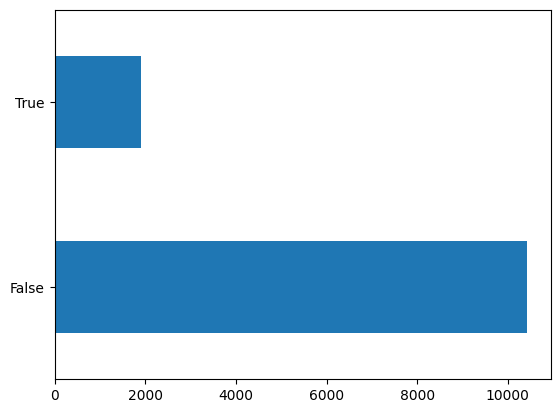

In [362]:
df['Revenue'].value_counts().plot(kind='barh')

Данные сильно скожени, неравномерны.

In [363]:
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

<Axes: xlabel='Revenue', ylabel='Count'>

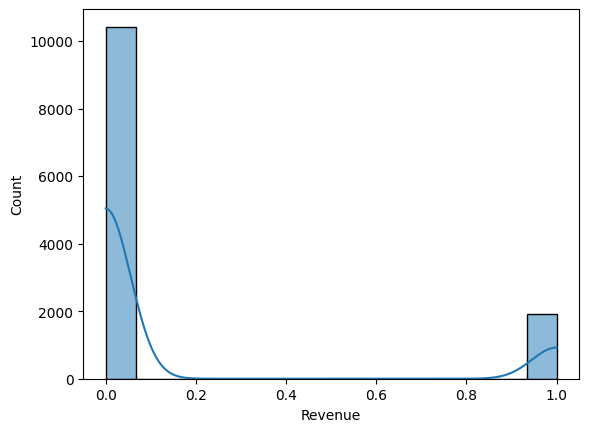

In [364]:
sns.histplot(data = df['Revenue'], kde = True)

#Вывод по анализу целевой переменной

Данные несбалансированные модель может быть предвзята в сторону предсказания нулевых результатов.

#Сравнение скорости работы Pandas и Polars

In [384]:
df_big = df.copy()

for i in range(7):
  df_big = pd.concat([df_big, df_big])

df_big.to_csv("online_shoppers_intention_big.csv", index=False)

In [382]:
df_big.shape, df.shape

((1578240, 18), (12330, 18))

In [383]:
!pip install polars

import polars as pl

print(pl.__version__)

0.20.2


### Загрузка данных

In [385]:
%%time

df_pl = pl.read_csv("online_shoppers_intention_big.csv")

CPU times: user 1.81 s, sys: 889 ms, total: 2.7 s
Wall time: 3.15 s


In [386]:
%%time

df = pd.read_csv("online_shoppers_intention_big.csv")

CPU times: user 3.89 s, sys: 610 ms, total: 4.5 s
Wall time: 5.09 s


### Выбор и фильтрация данных

In [387]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [388]:
%%time

df[['Informational', 'ProductRelated_Duration']]

CPU times: user 9.83 ms, sys: 0 ns, total: 9.83 ms
Wall time: 26.3 ms


,Informational,ProductRelated_Duration
0,0,0.000000
1,0,64.000000
2,0,0.000000
3,0,2.666667
4,0,627.500000
...,...,...
1578235,0,1783.791667
1578236,0,465.750000
1578237,0,184.250000
1578238,0,346.000000


In [389]:
%%time

df_pl[['Informational', 'ProductRelated_Duration']]

CPU times: user 157 µs, sys: 2 ms, total: 2.15 ms
Wall time: 15.2 ms


Informational,ProductRelated_Duration
i64,f64
0,0.0
0,64.0
0,0.0
0,2.666667
0,627.5
0,154.216667
0,0.0
0,0.0
0,37.0


In [390]:
# Pandas
%%time

df.query('ProductRelated_Duration > 100')

CPU times: user 140 ms, sys: 1.51 ms, total: 142 ms
Wall time: 278 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
10,0,0.0,0,0.0,3,395.000000,0.000000,0.066667,0.000000,0.0,Feb,1,1,3,3,Returning_Visitor,False,False
11,0,0.0,0,0.0,16,407.750000,0.018750,0.025833,0.000000,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578234,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
1578235,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
1578236,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
1578237,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False


In [391]:
# Polars
%%time

df_pl.filter(pl.col('ProductRelated_Duration') > 100)

CPU times: user 155 ms, sys: 407 ms, total: 562 ms
Wall time: 498 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
0,0.0,0,0.0,10,627.5,0.02,0.05,0.0,0.0,"""Feb""",3,3,1,4,"""Returning_Visi…",true,false
0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,"""Feb""",2,2,1,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,3,738.0,0.0,0.022222,0.0,0.4,"""Feb""",2,4,1,2,"""Returning_Visi…",false,false
0,0.0,0,0.0,3,395.0,0.0,0.066667,0.0,0.0,"""Feb""",1,1,3,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,16,407.75,0.01875,0.025833,0.0,0.4,"""Feb""",1,1,4,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,7,280.5,0.0,0.028571,0.0,0.0,"""Feb""",1,1,1,3,"""Returning_Visi…",false,false
2,53.0,0,0.0,23,1668.285119,0.008333,0.016313,0.0,0.0,"""Feb""",1,1,9,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,13,334.966667,0.0,0.007692,0.0,0.0,"""Feb""",1,1,1,4,"""Returning_Visi…",true,false
0,0.0,0,0.0,20,2981.166667,0.0,0.01,0.0,0.0,"""Feb""",2,4,4,4,"""Returning_Visi…",false,false


### Агрегация данных

In [392]:
df_pl.head()

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""Feb""",1,1,1,1,"""Returning_Visi…",false,false
0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,"""Feb""",2,2,1,2,"""Returning_Visi…",false,false
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""Feb""",4,1,9,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,"""Feb""",3,2,2,4,"""Returning_Visi…",false,false
0,0.0,0,0.0,10,627.5,0.02,0.05,0.0,0.0,"""Feb""",3,3,1,4,"""Returning_Visi…",true,false


In [393]:
%%time

df.groupby('Month').agg({'PageValues' : 'mean', 'BounceRates' : 'max'})

CPU times: user 176 ms, sys: 0 ns, total: 176 ms
Wall time: 237 ms


,PageValues,BounceRates
Month,,
Aug,6.331283,0.2
Dec,6.776007,0.2
Feb,0.895228,0.2
Jul,4.010617,0.2
June,3.391440,0.2
Mar,3.888561,0.2
May,5.443681,0.2
Nov,7.129370,0.2
Oct,8.709034,0.2


In [394]:
%%time

df_pl.groupby('Month').agg([pl.mean('PageValues'), pl.max('BounceRates')])

CPU times: user 91.6 ms, sys: 2.72 ms, total: 94.3 ms
Wall time: 161 ms


<timed eval>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.


Month,PageValues,BounceRates
str,f64,f64
"""Feb""",0.895228,0.2
"""Aug""",6.331283,0.2
"""Oct""",8.709034,0.2
"""Nov""",7.12937,0.2
"""June""",3.39144,0.2
"""Sep""",7.578859,0.2
"""Mar""",3.888561,0.2
"""Dec""",6.776007,0.2
"""Jul""",4.010617,0.2
